Assignment Content:

Launch the “DecisionTreesAssignment.ipynb” file in Jupyter Notebook and complete the assignment. Don’t forget to include tae.data in your directory or change the code to read this input file. Namely, build a decision tree classifier and test the classifier on previous and future data. Write a one page report explaining the following:

- How the decision tree classifier works
- Thoroughly explain the code (i.e. your implementation of the decision tree classifier)
- Try to get as high accuracy as possible on the future data.
- Is it possible to have both high training/previous and test/future accuracy? Why or why not?
- Play around with the sklearn DecisionTreeClassifier library, tweaking the various decision tree parameters and report on the results of your findings

Deliverables:

- Completed DecisionTreesAssignment.ipynb code which compiles, runs, and gives fairly good training and test accuracy (they don’t need to be 100%, but justify your answer in the report)
- Report (as docx, pdf, or any other popular text format)


## Import Data

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(threshold = np.inf, suppress = True)
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:88% !important; }</style>"))

#Dataset used: https://archive.ics.uci.edu/ml/datasets/Teaching+Assistant+Evaluation

ta_eval_raw = pd.read_csv('tae.data')

#Used for sampling (previous data) and (future data) 

total_sample_num = ta_eval_raw.shape[0]

#in order to simulate what would happen in real life scenarios, we choose
#50% of this dataset at random to be our previous (training) data

previous_data_to_train_on = ta_eval_raw.sample(int(0.5 * total_sample_num), replace = True)


## Assignment: Write code to build a decision tree classifier on this dataset

In [2]:
print('Full dataset dimensions: {0}'.format(ta_eval_raw.shape))

Full dataset dimensions: (151, 6)


In [3]:
# Convert data into numpy arrays
X = previous_data_to_train_on.iloc[:,:-1].values
y = previous_data_to_train_on.iloc[:,-1].values.reshape(-1, 1)

print('X dimensions: {0}'.format(X.shape))
print('y dimensions: {0}'.format(y.shape))


X dimensions: (75, 5)
y dimensions: (75, 1)


In [4]:
#TODO: Build your decision tree model here (keep the name of your decision tree consistent throughout the program)
#Hint: Read the sklearn DecisionTreeClassifier docs:
#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#Hint: You may also find it useful to visualize the tree in Graphviz as we've done in the lecture

decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X, y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Testing classifier on previous (training) data and future (test) data

In [5]:
#in order to simulate what would happen in real life scenarios, we choose
#50% of this dataset at random to be our future (test) data

future_data_we_will_test_on = ta_eval_raw.sample(int(0.5 * total_sample_num), replace = True)

#True values so that we can compare how good our classifier that we built performs

true_value_training = list(previous_data_to_train_on.iloc[:, 5])
true_value_future = list(future_data_we_will_test_on.iloc[:, 5])

#Using Decision Tree to predict the labels i.e. 1, 2, or 3 for training and test data

prediction_on_trainingdata = decision_tree.predict(previous_data_to_train_on.iloc[:, :-1])
prediction_on_futuredata = decision_tree.predict(future_data_we_will_test_on.iloc[:, :-1])

print('Data We Trained On Prediction Accuracy: {0}%'.format(sum(true_value_training == prediction_on_trainingdata) / len(prediction_on_trainingdata)))
print('Future Data Prediction Accuracy: {0}%'.format(sum(true_value_future == prediction_on_futuredata) / len(prediction_on_futuredata)))


Data We Trained On Prediction Accuracy: 0.9733333333333334%
Future Data Prediction Accuracy: 0.64%


# Improve the model

In [6]:
# Use sklearn's train_test_split to create train/test sets
# Create a test sample that is 50% of the sample just like the workflow above

from sklearn.model_selection import train_test_split

X = ta_eval_raw.iloc[:,:-1].values
y = ta_eval_raw.iloc[:,-1].values

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 1)

print('XTrain dimensions: {0}'.format(XTrain.shape))
print('XTest dimensions: {0}'.format(XTest.shape))
print('yTrain dimensions: {0}'.format(yTrain.shape))
print('yTest dimensions: {0}'.format(yTest.shape))


XTrain dimensions: (120, 5)
XTest dimensions: (31, 5)
yTrain dimensions: (120,)
yTest dimensions: (31,)


In [7]:
# Baseline

decision_tree = tree.DecisionTreeClassifier(random_state = 1)
decision_tree.fit(XTrain, yTrain)

yPredTrain = decision_tree.predict(XTrain)
yPredTest = decision_tree.predict(XTest)

print('Baseline performance: \n')

print('Data We Trained On Prediction Accuracy: {0}%'.format(sum(yTrain == yPredTrain) / len(yPredTrain)))
print('Future Data Prediction Accuracy: {0}%'.format(sum(yTest == yPredTest) / len(yPredTest)))


Baseline performance: 

Data We Trained On Prediction Accuracy: 0.975%
Future Data Prediction Accuracy: 0.6774193548387096%


In [30]:
# Setup parameter grid for grid search

parameters = {'criterion' : ['gini','entropy']
            ,'min_samples_split' : range(2,10)
            ,'max_depth': range(2,10)
            ,'max_leaf_nodes' : range(2,30)
           }
print(parameters)


{'criterion': ['gini', 'entropy'], 'min_samples_split': range(2, 10), 'max_depth': range(2, 10), 'max_leaf_nodes': range(2, 30)}


In [31]:
# Perform grid search with 10 fold cross validation using the parameter grid above
# This ran in less than 30 seconds on my local machine

from sklearn.model_selection import GridSearchCV

decision_tree = tree.DecisionTreeClassifier(random_state = 1)
gridSearch = GridSearchCV(estimator = decision_tree
                             ,param_grid = parameters
                             ,cv = 10
                             ,refit = True
                             )
gridSearch.fit(XTrain, yTrain)


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': range(2, 10), 'max_depth': range(2, 10), 'max_leaf_nodes': range(2, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
# Display best parameters chosen by grid search

print('Best parameters: {0}'.format(gridSearch.best_params_))


Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 22, 'min_samples_split': 2}


In [33]:
yPredTrain = gridSearch.predict(XTrain)
yPredTest = gridSearch.predict(XTest)

print('Grid search model performance: \n')

print('Data We Trained On Prediction Accuracy: {0}%'.format(sum(yTrain == yPredTrain) / len(yPredTrain)))
print('Future Data Prediction Accuracy: {0}%'.format(sum(yTest == yPredTest) / len(yPredTest)))


Grid search model performance: 

Data We Trained On Prediction Accuracy: 0.8166666666666667%
Future Data Prediction Accuracy: 0.7096774193548387%


In [34]:
gridSearch.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=22,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

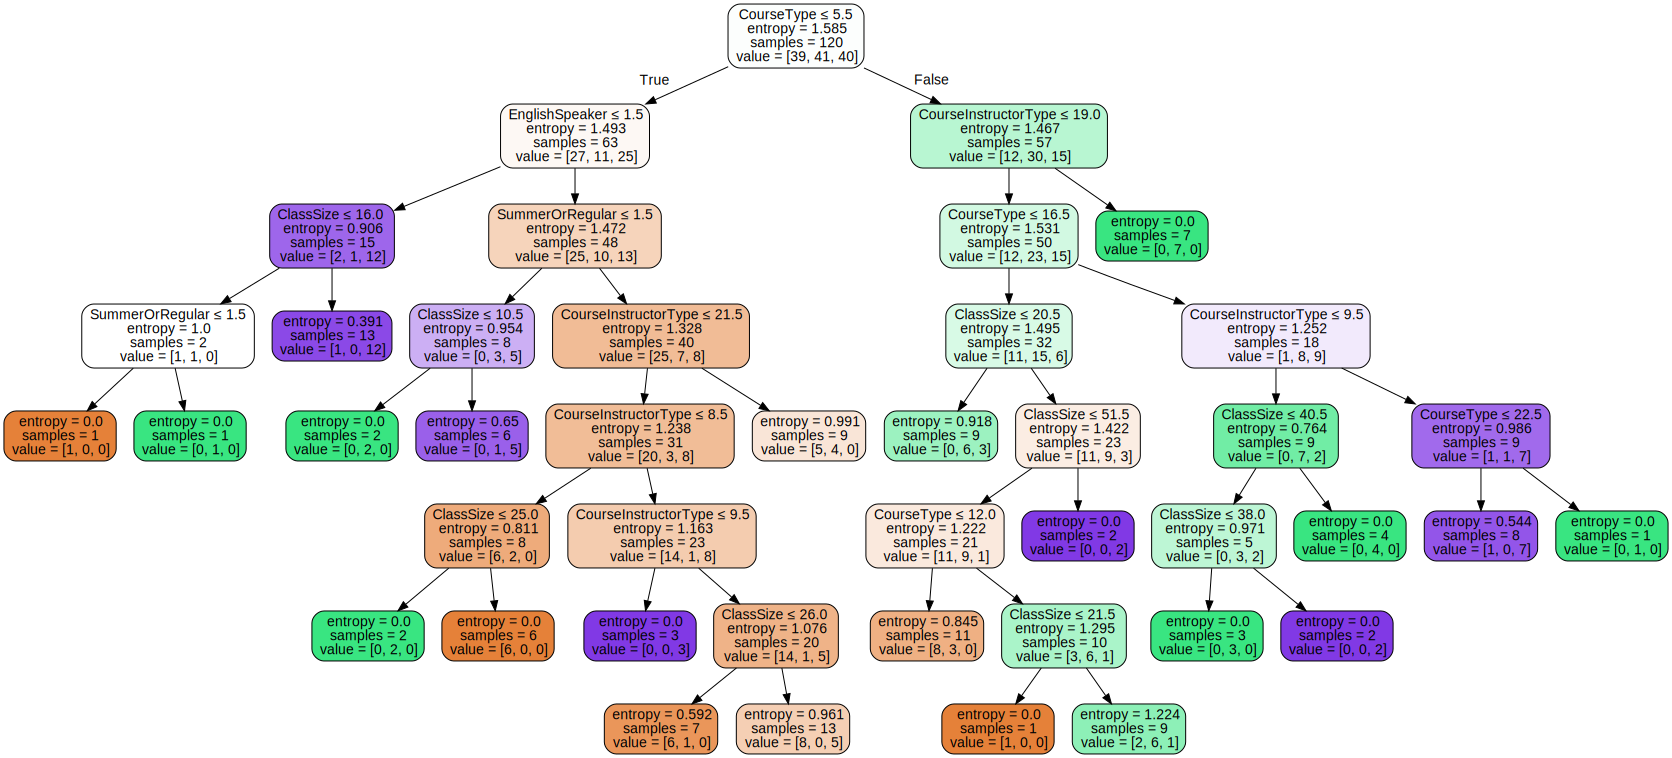

In [35]:
# Show tree for best estimator

import graphviz

treeViz = tree.export_graphviz(gridSearch.best_estimator_
                              ,out_file = None
                              ,feature_names = ta_eval_raw.columns[:-1]
                              #,class_names = ta_eval_raw.iloc[:,-1].unique()
                              ,filled = True
                              ,rounded = True
                              ,special_characters = True                               
                              )
graph = graphviz.Source(treeViz)
graph
